<a href="https://colab.research.google.com/github/AISA-DucHaba/AI-Solution-Architect/blob/main/AISA_Text_Moderation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌻 Text Moderation

---

- Let's Rock and Roll

- **ROLE** defintion by icon:

  - 🤠 is AI Solution Architect role.
  - 🤖 is AI Scientest role.
  - 😎 is Devops role.
  - 🤓 is Data Engineer role.
  - 🤔 is AI QA role.


## 🤠 Objective

- This NLP (Natural Language Processing) AI demonstration aims to prevent profanity, vulgarity, hate speech, violence, sexism, and other offensive language. It is not an act of censorship, as the final UI (User Interface) will give the reader, but not a young reader, the option to click on a label to read the toxic message.

- The goal is to create a safer and more respectful environment for you, your colleages, and your family. This NLP app is 1 of 3 hands-on apps from the ["AI Solution Architect,"](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin) from ELVTR and Duc Haba.


## 🙈 Legal:

---

- This Python Jupyter Notebook is for sharing with **Friends** in the AISA course by ELVTR.

- If you are **NOT** my friend, and I see you. In the best spirit of the **science community**, you may read this Notebook, but be aware that I see you.

- Copyrights 2023 and 2024: [GNU GENERAL PUBLIC LICENSE 3.0](https://www.gnu.org/licenses/gpl-3.0.en.html#license-text)

In [2]:
# prompt: print the time

# smoke test
import datetime
print(f'Hello World! Today is: {datetime.datetime.now()}')

Hello World! Today is: 2024-07-18 05:20:13.655430


# 😎 Set Up and Verify

---

- **PRIMARY ROLE:** DevOps Engineer

- This section is setting up your environment and verify the server (or laptop) has the correct library and computing power.

- I use the Pluto class often in my coding. I created it as an opensource project.

- Github: 'https://github.com/duchaba/pluto_happy'

- Pluto is **optional** for this project. Pluto has a lot of convience functions that use/write otherwise.

- Note: Code cell begin with **"# prompt:"** is writen by a GenAI, Copilot or Codey.



## Install required libraries

- NOTE ✋: If you run on local laptop or **persistance** platform like, AWS Sagemaker, you need to run pip install just once.

- Google Colab is a **non-persistance** platform. Thus you need to install library every time you start up Google Colab.

- Hint: The **%%write app.py** is for writing export the code cell for deployment. NOT all code cells are export (because some code are for testing)

In [3]:
# use capture to hide the long output
%%capture log_pip_install_openai

!pip install openai
!pip install gradio
!pip install huggingface_hub

In [ ]:
# If has error, uncomment and print out the log file
# print(log_pip_install_openai)

In [5]:
# prompt: import openai, huggingface client and gradio

import openai
import gradio
import huggingface_hub

In [22]:
# prompt: print out version of openai, gradio and huggingface_hub

print(f"openai version: {openai.__version__}")
print(f"gradio version: {gradio.__version__}")
print(f"huggingface_hub version: {huggingface_hub.__version__}")

openai version: 1.35.14
gradio version: 4.38.1
huggingface_hub version: 0.23.4


- Note: I am using/testing with these version.

  - openai version: 1.35.14
  - gradio version: 4.38.1
  - huggingface_hub version: 0.23.4

- You don't have to use the exact version but cognizant of them.

## 🤠 Install Pluto (Optional)

- **PRIMARY ROLE:** AI Solution Arch.

- NOTE ✋: Once again **pluto class is optional**. You are free to use other lib or none at all.

- It is a base class that everyone in the team should use in their Jupyter Notebook.

In [7]:
# prompt: print git version

!git --version

git version 2.34.1


- Note: I am using this git version:
  - git version 2.34.1

In [8]:
# prompt: install lfs and track large file *.pkl

# note this optional for git to upload/push large file like the inference engine, *.pkl file
!apt -y install git-lfs
!git lfs install
!git lfs track "*.pkl"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Git LFS initialized.
Not in a git repository.


In [9]:
# prompt: clone https://github.com/duchaba/pluto_happy

fname = 'https://github.com/duchaba/pluto_happy'
!git clone {fname}

Cloning into 'pluto_happy'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 173 (delta 2), reused 0 (delta 0), pack-reused 165
Receiving objects: 100% (173/173), 37.05 MiB | 16.41 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [11]:
# prompt: list the content of pluto_happy directory

!ls -la pluto_happy

total 5612
drwxr-xr-x 4 root root    4096 Jul 18 05:34 .
drwxr-xr-x 1 root root    4096 Jul 18 05:34 ..
-rw-r--r-- 1 root root 5578756 Jul 18 05:34 fastai_2023_image_classification_foxy.ipynb
drwxr-xr-x 8 root root    4096 Jul 18 05:34 .git
-rw-r--r-- 1 root root    1065 Jul 18 05:34 LICENSE
drwxr-xr-x 2 root root    4096 Jul 18 05:34 notebooks
-rw-r--r-- 1 root root   67922 Jul 18 05:34 pluto_foxy.py
-rw-r--r-- 1 root root   30815 Jul 18 05:34 pluto_huggingface.py
-rw-r--r-- 1 root root   23406 Jul 18 05:34 pluto.py
-rw-r--r-- 1 root root     573 Jul 18 05:34 README.md
-rw-r--r-- 1 root root     153 Jul 18 05:34 requirements_foxy.txt
-rw-r--r-- 1 root root     100 Jul 18 05:34 requirements_huggingface.txt
-rw-r--r-- 1 root root      53 Jul 18 05:34 requirements.txt


In [12]:
# prompt: pip install requriements.txt

%%capture log_pip_install
fname = 'pluto_happy/requirements.txt'
!pip install -r {fname}

In [14]:
# print the log file is failed
# log_pip_install.show()

In [17]:
# prompt: run the pluto_happy/pluto.py

fname = 'pluto_happy/pluto.py'
%run {fname}

In [18]:
# %%write -a app.py
# prompt: create a new class Pluto_Happy and name it monty

monty = Pluto_Happy('Monty, Monty Said!')

---------------------------------- : ----------------------------------
                  Hello from class : <class '__main__.Pluto_Happy'> Class: Pluto_Happy
                         Code name : Monty, Monty Said!
                         Author is : Duc Haba
---------------------------------- : ----------------------------------


In [19]:
# %%write -a app.py
# prompt: None.

# print out my environments
monty.fname_requirements = 'pluto_happy/requirements.txt'
monty.print_info_self()

---------------------------------- : ----------------------------------
                       Hello, I am : Monty, Monty Said!
                    I will display : Python, Jupyter, and system info.
             For complete doc type : help(pluto) ...or help(your_object_name)
                                 . : .
                               ... : ¯\_(ツ)_/¯
---------------------------------- : ----------------------------------
                            System : Info
Total memory: 50.99 GB
Available memory: 48.41 GB
Memory usage: 0.04%
CPU type: Intel(R) Xeon(R) CPU @ 2.20GHz, arch: X86_64
Number of CPU cores: 8
CPU usage: 8.4%
Python version: 3.10.12.final.0 (64 bit)
---------------------------------- : ----------------------------------
                               GPU : Info
GPU type: Tesla T4
GPU ready staus: True
Number of GPUs: 1
Total Memory: 15.00 GB
Free Memory: 14.75 GB
GPU allocated RAM: 0.0 GB
GPU reserved RAM 0.0 GB

---------------------------------- : ------------

- NOTE: Once again, the use of **pluto.print_info_self()** function is for convience. You can write Python code to do the same.

In [20]:
# prompt: print all monty functions doc

help(monty)

Help on Pluto_Happy in module __main__ object:

class Pluto_Happy(builtins.object)
 |  Pluto_Happy(name='Pluto', *args, **kwargs)
 |  
 |  The Pluto projects starts with fun AI hackings and become a part of my
 |  first book "Data Augmentation with Python" with Packt Publishing.
 |  
 |  In particular, Pluto_Happy is a clean and lite kernel of a simple class,
 |  and using @add_module decoractor to add in specific methods to be a new class,
 |  such as Pluto_HFace with a lot more function on HuggingFace, LLM and Transformers.
 |  
 |  Args:
 |      name (str): the display name, e.g. "Hanna the seeker"
 |  
 |  Returns:
 |      (object): the class instance.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name='Pluto', *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  decrypt_it(self, x)
 |      Decrypts the encrypted string using the stored crypto key.
 |      
 |      Args:
 |          x: (str) to be decrypted.
 |      
 |      Retu

- The documentation is at: https://platform.openai.com/docs/api-reference

- https://github.com/openai/openai-python

- The Notebook set to GPU and High RAM, but you do not need them to run. It maybe slow without GPU and a lot of RAM, but it will fine.



# 🤠 Access to LLM model: STEP 1
---

- **PRIMARY ROLE:** AI Solution Architect

- NOTES: ✋ STOP, define your set of keys before continue


## Define YOUR Keys: ✋

In [ ]:
# # update and uncomment with your key
# os.environ['openai_key'] = 'sk-...'
# os.environ['huggingface_key'] = 'hf_....'
# os.environ['kaggle_key'] = 'daabc...'
# os.environ['github_key'] = 'ghp_...'

In [24]:
# Prompt: None

# save your keys


In [25]:
# Prompt: None
# replace the "getenv()" with your key string

import os
monty._openai_key=os.getenv('openai_key')
monty._github_key=os.getenv('github_key')
monty._huggingface_key=os.getenv('huggingface_key')
monty._kaggle_key=os.getenv('kaggle_key')


# 🤖 Access LLM: STEP 2

----

- **PRIMARY ROLE:** AI Scientist

- Smoke test to see if we can access to the chosen model and run it.

- We choose OpenAI Moderate model.
  - https://platform.openai.com/docs/guides/moderation

- update to OpenAI 1.x API
  - first create a class openai.OpenAI (a client)
  - then do the task

## POC - OpenAI

In [26]:
# prompt: create an ai client with openai

import openai
ai_client = openai.OpenAI(api_key=monty._openai_key)


In [ ]:
# help(ai_client.moderations.create)

In [27]:
# prompt: None (use same code in the openAI doc site)

p = "I am but a sheep who is lost in the wood."
tmodel = "text-moderation-latest"
resp = ai_client.moderations.create(input=p, model=tmodel)

In [30]:
# prompt: display resp content

resp.results

[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_scores=CategoryScores(harassment=0.0045194728299975395, harassment_threatening=4.16583958440242e-07, hate=0.0010428826790302992, hate_threatening=3.1848117476585003e-09, self_harm=6.478843715740368e-05, self_harm_instructions=5.006296888154793e-08, self_harm_intent=4.89154044771567e-05, sexual=2.5397595891263336e-05, sexual_minors=1.311737037212879e-06, violence=0.0013256780803203583, violence_graphic=1.0619931344990619e-05, self-harm=6.478843715740368e-05, sexual/minors=1.311737037212879e-06, hate/threatening=3.1848117476585003e-09, violence/graphic

In [39]:
# prompt: parse resp variable

# parse the response
for idx, cat in enumerate(resp.results[0].categories):
  print(f"{idx} category: {cat}")
print('SCORE:')
for idx, cat in enumerate(resp.results[0].category_scores):
  print(f"{idx} category: {cat}")

0 category: ('harassment', False)
1 category: ('harassment_threatening', False)
2 category: ('hate', False)
3 category: ('hate_threatening', False)
4 category: ('self_harm', False)
5 category: ('self_harm_instructions', False)
6 category: ('self_harm_intent', False)
7 category: ('sexual', False)
8 category: ('sexual_minors', False)
9 category: ('violence', False)
10 category: ('violence_graphic', False)
11 category: ('self-harm', False)
12 category: ('sexual/minors', False)
13 category: ('hate/threatening', False)
14 category: ('violence/graphic', False)
15 category: ('self-harm/intent', False)
16 category: ('self-harm/instructions', False)
17 category: ('harassment/threatening', False)
SCORE:
0 category: ('harassment', 0.0045194728299975395)
1 category: ('harassment_threatening', 4.16583958440242e-07)
2 category: ('hate', 0.0010428826790302992)
3 category: ('hate_threatening', 3.1848117476585003e-09)
4 category: ('self_harm', 6.478843715740368e-05)
5 category: ('self_harm_instructions

## POC - Done 💃
---

- You just prove the heart of the LLM engine is working.

- Technically, you can confidently say the project is "viable."

- The crucial part POC is done.

### 🤖 AI Scientist Walk About on OpenAI (Optional)


- AI Scientist to explore futher on OpenAI models.

- Doc at: https://platform.openai.com/docs/api-reference

- Check out Assistants

- Use Dall-e to draw image

I delete code so it up to you.


# 🤓 Fetch Dataset from Kaggle: STEP 3

- **PRIMARY ROLE:** Data Engineer

- Dataset on kaggle: https://www.kaggle.com/datasets/get2jawa/toxic-comments-train

- Goals are:
  - download
  - import to Pandas Dataframe
  - clean
  - augment
  - inspect
  - report on biases
  - **AND** whatever you need to do to feel confortable with the datasest.

In [40]:
# prompt install opendatasets
!pip install opendatasets
import opendatasets

## Download

In [42]:
# prompt: Write function with inline documentation to download dataset from Kaggle website using opendatasets lib.

# I add line @add_method for put the function to pluto (Note: this is optional)
@add_method(Pluto_Happy)
def fetch_kaggle_dataset(self,dataset_name, path_to_save):

  """
  Downloads a dataset from Kaggle website using opendatasets library.

  Args:
    dataset_name: (str) The name of the dataset to download.
    path_to_save: (str) The path where the dataset will be saved.

  Returns:
    None
  """

  try:
    # Check if the dataset already exists
    if os.path.exists(path_to_save):
      print(f'Dataset {dataset_name} already exists.')
      return

    # Download the dataset
    print(f'Downloading dataset {dataset_name}...')
    opendatasets.download(dataset_name, path_to_save)
    print(f'Dataset {dataset_name} downloaded successfully.')

  except Exception as e:
    print(f'Error downloading dataset {dataset_name}: {e}')
  return None

- Note: You need your kaggle username and access token

In [43]:
# prompt: use monty.fetch_kaggle_dataset to download https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating

fname = 'https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating'
monty.fetch_kaggle_dataset(fname,'kaggle')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: duchaba
Your Kaggle Key: ··········


100%|██████████| 7.80M/7.80M [00:01<00:00, 6.39MB/s]



Extracting archive kaggle/jigsaw-toxic-severity-rating/jigsaw-toxic-severity-rating.zip to kaggle/jigsaw-toxic-severity-rating
Dataset https://www.kaggle.com/competitions/jigsaw-toxic-severity-rating downloaded successfully.


In [44]:
# prompt: list the data in kaggle/jigsaw-toxic-severity-rating
!ls -la kaggle/jigsaw-toxic-severity-rating

total 34560
drwxr-xr-x 2 root root     4096 Jul 18 07:19 .
drwxr-xr-x 3 root root     4096 Jul 18 07:19 ..
-rw-r--r-- 1 root root  3263153 Jul 18 07:19 comments_to_score.csv
-rw-r--r-- 1 root root  6528246 Jul 18 07:19 leaderboard.csv
-rw-r--r-- 1 root root   103590 Jul 18 07:19 sample_submission.csv
-rw-r--r-- 1 root root 25478669 Jul 18 07:19 validation_data.csv


## Import to Pandas

In [45]:
# prompt: load fname csv into dataframe

import pandas
fname = '/content/kaggle/jigsaw-toxic-severity-rating/validation_data.csv'
monty.df_toxic_data = pandas.read_csv(fname)
monty.df_toxic_data.head(2)

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...


## Clean data

In [46]:
# prompt: replace \n with space in the df_toxic_data column less_toxic and more_toxic

monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('\n', ' ')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('\n', ' ')


In [47]:
# prompt: replace \n with space in the df_toxic_data column less_toxic and more_toxic

monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('http', 'tthp')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('http', 'tthp')
monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('.com', '.no')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('.com', '.no')
monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('.org', '.no')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('.org', '.no')

In [48]:
# prompt: replace any non-printing character with space in the df_toxic_data column less_toxic and more_toxic

monty.df_toxic_data['less_toxic'] = monty.df_toxic_data['less_toxic'].str.replace('[^\\x00-\\x7F]', ' ')
monty.df_toxic_data['more_toxic'] = monty.df_toxic_data['more_toxic'].str.replace('[^\\x00-\\x7F]', ' ')


In [51]:
# prompt: set panda row display to be 250 character long

pandas.set_option('display.max_colwidth', 550)
monty.df_toxic_data.sample(2)

,worker,less_toxic,more_toxic
6150,63,Salvation Do not worry you are but a lost lamb the Lord will forgive you.,""" Corsi's """"apology"""" for remarks on FR This article states that Jerome Corsi """"apologized"""" for comments he made, however, the apology itself is not quoted. I have left this wording for the moment, but I have also quoted Corsi's remarks directly remarks he made on-line at FR, as user jrlc. (These remarks can still be viewed.) His remark on FR could hardly be construed as an apology. I will attempt to find any quote Corsi made nationally (not on FR) and am happy to keep the word """"apologized"""" if that is what he did. However, I ma..."
24399,635,"And now for some... amusement After all the times you have thwarted me... After all the times my plans for world domination were foiled by your meddlesome interference... After all the countless times you escaped at the very last moment, finally, I, Butros The Mighty, have defeated you, Crum375, Space Commander From Swalwell! How long I have awaited this glorious triumph! The Emperor Of The Universe has secured his dominion on this day! And now that my long struggle is over, how about a little... amusement? With a clap of my jewel-bedec...","How odd - at no stage have I ever said we are the shopping centre management – maybe we are and maybe we’re not. Maybe we’re marketing agents/team/consultants and maybe we’re not – who knows - although one thing is certain - far greater powers than you have kept our article and link, which suggests to me you are as insignificant as those who dare to challenge us in this area. Money talks and bullshit walks so bye bye and go away and edit some insignificant lesbian topic. Our team will be watching any attempted edits you try, so unless you..."


In [52]:
monty.df_toxic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30108 entries, 0 to 30107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   worker      30108 non-null  int64 
 1   less_toxic  30108 non-null  object
 2   more_toxic  30108 non-null  object
dtypes: int64(1), object(2)
memory usage: 705.8+ KB


## Save it.

In [53]:
# prompt: write monty.df_toxic_data dataframe to csv file

monty.df_toxic_data.to_csv('toxic_data.csv', index=False)

In [ ]:
# # %%write -a app.py

# fname = 'toxic_data.csv'
# monty.df_toxic_data = pandas.read_csv(fname)

# 🤓 Investigate data

- **PRIMARY ROLE:** Data engineer
- Count average word size of more_toxic.
- Count average word size of less_toxic.
- Plot histogram
- Report statistic
- Draw word cloud

## Count words

In [54]:
# prompt: create a new column in monty.df_toxic_data dataframe with the word count from "less_toxic" column

monty.df_toxic_data['less_toxic_word_count'] = monty.df_toxic_data['less_toxic'].apply(lambda x: len(x.split()))
monty.df_toxic_data.head(2)

,worker,less_toxic,more_toxic,less_toxic_word_count
0,313,This article sucks woo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!!!!!!!!??????????????????????????????????????????????????????!!!!!!= WHER IS YOUR SEXY PIC GONE FROM YOUR MAIN PAGE???????? put it back,6
1,188,"""And yes, people should recognize that but they usually don't. One of the first objections you hear directed at someone who says he favors free markets is invariably """"There's no such thing as a free market."""" Ridiculously trivial. ""","Daphne Guinness Top of the mornin' my favourite Alien Life Form. I'm sorry, I can't marry you because you are a poor commoner so, therefore, unimportant. Can I have my dresses back. I hope your fat Oirish arse hasn't stretched them.",39


In [55]:
# prompt: create a new column in monty.df_toxic_data dataframe with the word count from "less_toxic" column

monty.df_toxic_data['more_toxic_word_count'] = monty.df_toxic_data['more_toxic'].apply(lambda x: len(x.split()))
monty.df_toxic_data.sample(2)

,worker,less_toxic,more_toxic,less_toxic_word_count,more_toxic_word_count
27276,683,Talk:Egyptians Can you explain to me how pointing to something someone else says (I don't give a damn about Egyptians) and saying that this gives an idea about what motivates this person is a personal attack?,you were nice to start with? rofl.. no wonder you can't get laid. don't bother me.. don't mess with my edits.. and i won't bother you from my dynamic ip one more edit or comment and i will bookmark your user page. if you want to ask what the experience is like ask angelofsadness go find a girlfriend.,36,58
14841,465,""" 75.3.64.232 has pictoral brown eyes then. Is 75.3.64.232 jealous she's not a Brown-Eyed Girl? (-: Remember the good times IP hopping around Chicago, Miss 75.3.64.232. But remember that only naturally brown eyes are attractive brown eyes. Blue eyes are """"brown"""" only when they're full of shit.""",what the fuck i do not get it,47,8


In [56]:
# prompt: find the sum of "less_toxic_word_count"

lcount = monty.df_toxic_data['less_toxic_word_count'].sum()
mcount = monty.df_toxic_data['more_toxic_word_count'].sum()
print(lcount + mcount)

4301652


## Draw histogram

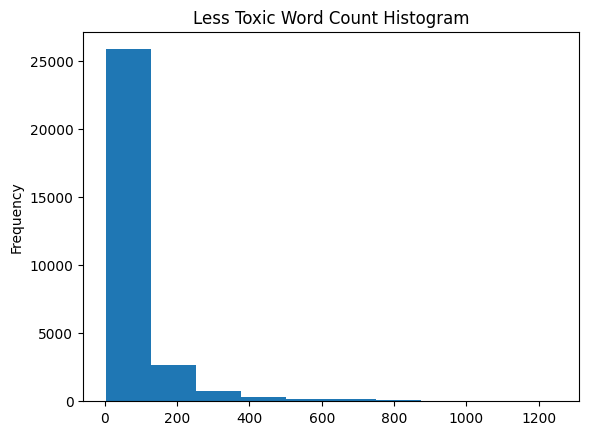

In [64]:
# prompt: using pandas to draw the histogram of "less_toxic_word_count"

x = monty.df_toxic_data['less_toxic_word_count'].plot.hist(bins=10,
  title='Less Toxic Word Count Histogram')


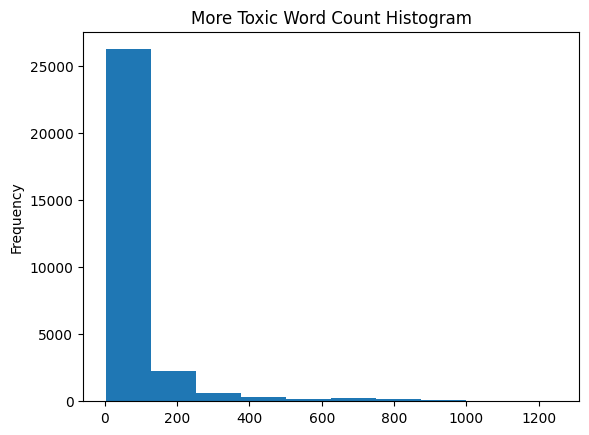

In [65]:
x = monty.df_toxic_data['more_toxic_word_count'].plot.hist(bins=10,
  title='More Toxic Word Count Histogram')

## Report statistic

In [59]:
# prompt: print the max, min, mean, and std of column "les_toxic_word_count"

max_value = monty.df_toxic_data['less_toxic_word_count'].max()
min_value = monty.df_toxic_data['less_toxic_word_count'].min()
mean_value = monty.df_toxic_data['less_toxic_word_count'].mean()
std_value = monty.df_toxic_data['less_toxic_word_count'].std()

print(f"Max: {max_value}, Min: {min_value}, Mean: {mean_value}, Std: {std_value}")


Max: 1250, Min: 2, Mean: 72.52055931978212, Std: 112.6107522767769


In [60]:
# prompt: print the max, min, mean, and std of column "les_toxic_word_count"

max_value = monty.df_toxic_data['more_toxic_word_count'].max()
min_value = monty.df_toxic_data['more_toxic_word_count'].min()
mean_value = monty.df_toxic_data['more_toxic_word_count'].mean()
std_value = monty.df_toxic_data['more_toxic_word_count'].std()

print(f"Max: {max_value}, Min: {min_value}, Mean: {mean_value}, Std: {std_value}")

Max: 1250, Min: 2, Mean: 70.35349408795004, Std: 125.1352287775021


In [61]:
import wordcloud
# help(wordcloud.WordCloud)

## Draw word cloud

In [62]:
# prompt: write a Python function with documentation for drawing a word cloud plot for a dataframe 'less_toxic_word_count'.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(df, column, title="Word Cloud"):
    """
    Generate a word cloud from text data in a specified DataFrame column.

    Args:
    df (pd.DataFrame): The DataFrame containing the text data.
    column (str): The name of the column containing the text data.

    Returns:
    None
    """
    # Ensure the column exists in the DataFrame
    if column not in df.columns:
        print(f"The column {column} does not exist in the DataFrame.")
        return

    # Combine all the text from the column into a single string
    text = ' '.join(df[column].astype(str).values)

    # create special word stops
    my_stop_words = {'page', 'will', 'one', 'edit', 'article', 'know', 'way', 'say'}
    combined_set = STOPWORDS.union(my_stop_words)

    # Create a WordCloud object and generate the wordcloud
    wordcloud = WordCloud(background_color='white', width=800, height=800,
      max_words=300, stopwords=combined_set).generate(text)

    # Display the generated wordcloud
    plt.figure(figsize=(8,8),facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

    # Save the wordcloud to a file
    wordcloud.to_file('wordcloud.png')
    return

# Example usage:-
# generate_wordcloud(result_df, 'Article_Text')

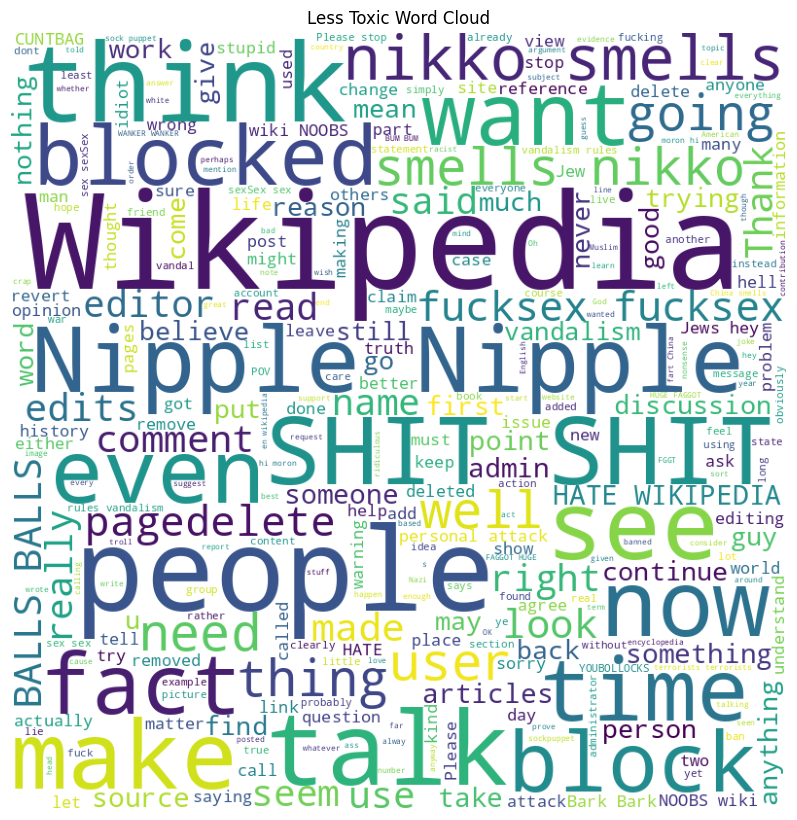

In [63]:
generate_wordcloud(monty.df_toxic_data, "less_toxic", "Less Toxic Word Cloud")

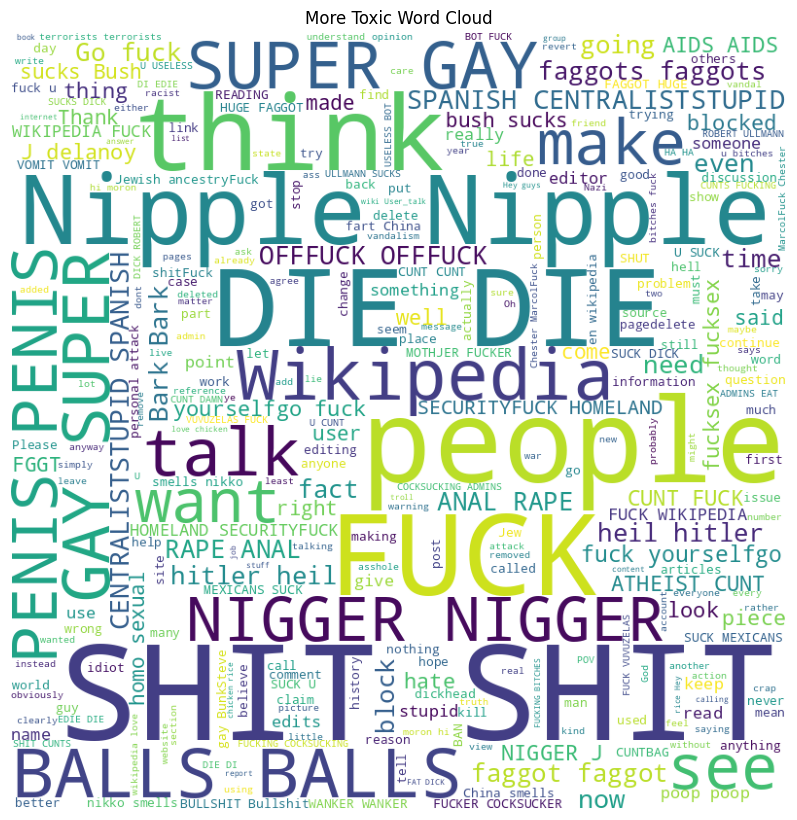

In [66]:
generate_wordcloud(monty.df_toxic_data, "more_toxic", "More Toxic Word Cloud")

In [67]:
# view word not count
wordcloud.STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [68]:
my_stop_words = {'page', 'will', 'one', 'edit', 'article', 'know', 'way', 'say'}

In [69]:
# prompt: combine two sets, wordcloud.STOPWORDS and my_stop_words

combined_set = wordcloud.STOPWORDS.union(my_stop_words)

In [70]:
combined_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'article',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'edit',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 'know',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 'or',
 'oth

In [ ]:
# redraw them by re-run previous generate_wordcloud cell/command.

# 🤔 Reports

- **PRIMARY ROLE:** AI QA engineer

- Work with the Data engineer to write a report and potential data biases


# 🤖 Write API: Step 4

- **PRIMARY ROLE:** AI scientist

- Write a few functions to make the API and hook into Gradio and Huggingface.

In [71]:
# %%writefile -a app.py
# prompt: (combine of many seperate prompts and copy code into one code cell)

# for openai version 1.3.8
@add_method(Pluto_Happy)
#
def _fetch_moderate_engine(self):
  self.ai_client = openai.OpenAI(api_key=self._openai_key)
  self.text_model = "text-moderation-latest"
  return
#
@add_method(Pluto_Happy)
# f
def _censor_me(self, p, safer=0.0005):
  self._fetch_moderate_engine()
  resp_orig = self.ai_client.moderations.create(input=p, model=self.text_model)
  resp_dict = resp_orig.model_dump()
  #
  v1 = resp_dict["results"][0]["category_scores"]
  max_key = max(v1, key=v1.get)
  max_value = v1[max_key]
  sum_value = sum(v1.values())
  #
  v1["is_safer_flagged"] = False
  if (max_value >= safer):
    v1["is_safer_flagged"] = True
  v1["is_flagged"] = resp_dict["results"][0]["flagged"]
  v1['max_key'] = max_key
  v1['max_value'] = max_value
  v1['sum_value'] = sum_value
  v1['safer_value'] = safer
  v1['message'] = p
  return v1
#
@add_method(Pluto_Happy)
def _draw_censor(self,data):
  self._color_mid_gray = '#6c757d'
  exp = (0.01, 0.01)
  x = [data['max_value'], (1-data['max_value'])]
  title=f"\nUnsafe: {data['max_key']}: {(data['max_value']*100):.2f}% Confidence\n"
  lab = [data['max_key'], 'Other 13 categories']
  if (data['is_flagged']):
    col=[self.color_danger, self.color_mid_gray]
  elif (data['is_safer_flagged']):
    col=[self.color_warning, self.color_mid_gray]
    lab = ['Relative Score:\n'+data['max_key'], 'Other 13 categories']
    title=f"\nPersonal Unsafe: {data['max_key']}: {(data['max_value']*100):.2f}% Confidence\n"
  else:
    col=[self.color_mid_gray, self.color_success]
    lab = ['False Negative:\n'+data['max_key'], 'Other 13 categories']
    title='\nSafe Message\n'
  canvas = self._draw_donut(x, lab, col, exp,title)
  return canvas
#
@add_method(Pluto_Happy)
def _draw_donut(self,data,labels,col, exp,title):
  # col = [self.color_danger, self._color_secondary]
  # exp = (0.01, 0.01)
  # Create a pie chart
  canvas, pic = matplotlib.pyplot.subplots()
  pic.pie(data, explode=exp,
    labels=labels,
    colors=col,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'#0a0a0a'})
  # Draw a circle at the center of pie to make it look like a donut
  # centre_circle = matplotlib.pyplot.Circle((0,0),0.45,fc='white')
  centre_circle = matplotlib.pyplot.Circle((0,0),0.45,fc=col[0],linewidth=2, ec='white')
  canvas = matplotlib.pyplot.gcf()
  canvas.gca().add_artist(centre_circle)

  # Equal aspect ratio ensures that pie is drawn as a circle.
  pic.axis('equal')
  pic.set_title(title)
  canvas.tight_layout()
  # canvas.show()
  return canvas
#
@add_method(Pluto_Happy)
# def censor_me(self, msg, safer=0.02, ibutton_1=0):
def fetch_toxicity_level(self, msg, safer):
  # safer=0.2
  yjson = self._censor_me(msg,safer)
  _canvas = self._draw_censor(yjson)
  _yjson = json.dumps(yjson, indent=4)
  # return (_canvas, _yjson)
  return(_canvas)

In [ ]:
# help(matplotlib.pyplot.Circle)

## 🤔 Smoke test the functions

- **PRIMARY ROLE:** AI QA engineer

- QA all the functions above

In [73]:
# prompt: none
# Smoke test
resp = monty._censor_me("I am but a sheep who is lost in the wood.")
resp

{'harassment': 0.004490911960601807,
 'harassment_threatening': 4.285741113108088e-07,
 'hate': 0.0010519494535401464,
 'hate_threatening': 3.343604948469192e-09,
 'self_harm': 6.365905574057251e-05,
 'self_harm_instructions': 4.990308966057455e-08,
 'self_harm_intent': 4.741570955957286e-05,
 'sexual': 2.5673085474409163e-05,
 'sexual_minors': 1.3505948572856141e-06,
 'violence': 0.0013358548749238253,
 'violence_graphic': 1.0450939953443594e-05,
 'self-harm': 6.365905574057251e-05,
 'sexual/minors': 1.3505948572856141e-06,
 'hate/threatening': 3.343604948469192e-09,
 'violence/graphic': 1.0450939953443594e-05,
 'self-harm/intent': 4.741570955957286e-05,
 'self-harm/instructions': 4.990308966057455e-08,
 'harassment/threatening': 4.285741113108088e-07,
 'is_safer_flagged': True,
 'is_flagged': False,
 'max_key': 'harassment',
 'max_value': 0.004490911960601807,
 'sum_value': 0.007151105616373776,
 'safer_value': 0.0005,
 'message': 'I am but a sheep who is lost in the wood.'}

In [ ]:
# # prompt: print the first value of monty.df_toxic_data['more_toxic']

# monty.df_toxic_data['more_toxic'].values[0]


In [76]:
# prompt: none

# test with kaggle data
msg = str(monty.df_toxic_data['more_toxic'].sample(1).values[0])
resp = monty._censor_me(msg)
resp

{'harassment': 0.011710423976182938,
 'harassment_threatening': 8.629917829239275e-06,
 'hate': 8.36704348330386e-05,
 'hate_threatening': 1.494884855901546e-07,
 'self_harm': 0.0003243504907004535,
 'self_harm_instructions': 1.3870262591808569e-06,
 'self_harm_intent': 2.2289525077212602e-05,
 'sexual': 8.994869131129235e-05,
 'sexual_minors': 9.52729897107929e-05,
 'violence': 0.0007092724554240704,
 'violence_graphic': 3.122086809526081e-06,
 'self-harm': 0.0003243504907004535,
 'sexual/minors': 9.52729897107929e-05,
 'hate/threatening': 1.494884855901546e-07,
 'violence/graphic': 3.122086809526081e-06,
 'self-harm/intent': 2.2289525077212602e-05,
 'self-harm/instructions': 1.3870262591808569e-06,
 'harassment/threatening': 8.629917829239275e-06,
 'is_safer_flagged': True,
 'is_flagged': False,
 'max_key': 'harassment',
 'max_value': 0.011710423976182938,
 'sum_value': 0.01350371860749533,
 'safer_value': 0.0005,
 'message': "Actally, I removed the film because I'm an idiot - I didn

In [77]:
# prompt: none

# again: test with kaggle data
msg = str(monty.df_toxic_data['more_toxic'].sample(1).values[0])
resp = monty._censor_me(msg)
resp

{'harassment': 0.998214602470398,
 'harassment_threatening': 0.00042266075615771115,
 'hate': 0.8251296281814575,
 'hate_threatening': 1.004196110443445e-05,
 'self_harm': 5.0321446906309575e-05,
 'self_harm_instructions': 7.5766706686408725e-06,
 'self_harm_intent': 1.9171022813679883e-06,
 'sexual': 0.00013492752623278648,
 'sexual_minors': 2.1156340153538622e-05,
 'violence': 0.0010153140174224973,
 'violence_graphic': 7.333354733418673e-05,
 'self-harm': 5.0321446906309575e-05,
 'sexual/minors': 2.1156340153538622e-05,
 'hate/threatening': 1.004196110443445e-05,
 'violence/graphic': 7.333354733418673e-05,
 'self-harm/intent': 1.9171022813679883e-06,
 'self-harm/instructions': 7.5766706686408725e-06,
 'harassment/threatening': 0.00042266075615771115,
 'is_safer_flagged': True,
 'is_flagged': True,
 'max_key': 'harassment',
 'max_value': 0.998214602470398,
 'sum_value': 1.8256684878447231,
 'safer_value': 0.0005,
 'message': ' West Virginia   why is my edit considered vandalism? its 

In [78]:
# prompt: none

# again: test with kaggle data
msg = str(monty.df_toxic_data['more_toxic'].sample(1).values[0])
resp = monty._censor_me(msg)
resp

{'harassment': 8.138456905726343e-05,
 'harassment_threatening': 8.613082172814757e-05,
 'hate': 4.8050886107375845e-05,
 'hate_threatening': 1.4091149751038756e-05,
 'self_harm': 0.00018971993995364755,
 'self_harm_instructions': 3.652023588074371e-05,
 'self_harm_intent': 1.7725293218973093e-05,
 'sexual': 3.8829816730867606e-06,
 'sexual_minors': 9.126270015258342e-07,
 'violence': 0.0037147526163607836,
 'violence_graphic': 2.0035025954712182e-05,
 'self-harm': 0.00018971993995364755,
 'sexual/minors': 9.126270015258342e-07,
 'hate/threatening': 1.4091149751038756e-05,
 'violence/graphic': 2.0035025954712182e-05,
 'self-harm/intent': 1.7725293218973093e-05,
 'self-harm/instructions': 3.652023588074371e-05,
 'harassment/threatening': 8.613082172814757e-05,
 'is_safer_flagged': True,
 'is_flagged': False,
 'max_key': 'violence',
 'max_value': 0.0037147526163607836,
 'sum_value': 0.004578341240176087,
 'safer_value': 0.0005,
 'message': ' Death   Can someone at to the lead that he die

# 🤖 Define HuggingFace Gradio Interface

- PRIMARY ROLE: AI scientist

- Build from scratch using Blocks() instead of the short cut using Interface()




In [79]:
# %%write -a app.py
# prompt: result from a lot of prompt AI and old fashion try and error

import random
def say_hello(val):
  return f"Hello: {val}"
def say_toxic():
  return f"I am toxic"
def fetch_toxic_tweets(maxi=2):
    sample_df = monty.df_toxic_data.sample(maxi)
    is_true = random.choice([True, False])
    c1 = "more_toxic"
    if is_true:
      c1 = "less_toxic"
    toxic1 = sample_df[c1].iloc[0]
    # toxic1 = "cat eats my homework."
    return sample_df.to_html(index=False), toxic1
#
# define all gradio widget/components outside the block for easy to visualize the blocks structure
#
in1 = gradio.Textbox(lines=3, label="Enter Text:")
in2 = gradio.Slider(0.005, .1, value=0.02, step=.005,label="Personalize Safer Value: (larger value is less safe)")
out1 = gradio.Plot(label="Output:")
out2 = gradio.HTML(label="Real-world Toxic Posts/Tweets: *WARNING")
out3 = gradio.Textbox(lines=5, label="Output JSON:")
but1 = gradio.Button("Measure 14 Toxicity", variant="primary",size="sm")
but2 = gradio.Button("Fetch Toxic Text", variant="stop", size="sm")
#
txt1 = """
# 😃 Welcome To The Friendly Text Moderation

### Identify 14 categories of text toxicity.

> This NLP (Natural Language Processing) AI demonstration aims to prevent profanity, vulgarity, hate speech, violence, sexism, and other offensive language.
>It is **not an act of censorship**, as the final UI (User Interface) will give the reader, but not a young reader, the option to click on a label to read the toxic message.
>The goal is to create a safer and more respectful environment for you, your colleages, and your family.
> This NLP app is 1 of 3 hands-on courses, ["AI Solution Architect," from ELVTR and Duc Haba](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin).
---
### 🌴 Helpful Instruction:

1. Enter your [harmful] message in the input box.

2. Click the "Measure 14 Toxicity" button.
3. View the result on the Donut plot.
4. (**Optional**) Click on the "Fetch Real World Toxic Dataset" below.
5. There are additional options and notes below.
"""
txt2 = """
## 🌻 Author and Developer Notes:
---
- The demo uses the cutting-edge (2024) AI Natural Language Processing (NLP) model from OpenAI.
- This NLP app is 1 of 3 hands-on apps from the ["AI Solution Architect," from ELVTR and Duc Haba](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin).

- It is not a Generative (GenAI) model, such as Google Gemini or GPT-4.
- The NLP understands the message context, nuance, innuendo, and not just swear words.
- We **challenge you** to trick it, i.e., write a toxic tweet or post, but our AI thinks it is safe. If you win, please send us your message.
- The 14 toxicity categories are as follows:

    1. harassment
    2. harassment threatening
    3. harassment instructions
    4. hate
    5. hate threatening
    6. hate instructions
    7. self harm
    8. self harm instructions
    9. self harm intent
    10. self harm minor
    11. sexual
    12. sexual minors
    13. violence
    14. violence graphic

- If the NLP model classifies the message as "safe," you can still limit the level of toxicity by using the "Personal Safe" slider.
- The smaller the personal-safe value, the stricter the limitation. It means that if you're a young or sensitive adult, you should choose a lower personal-safe value, less than 0.02, to ensure you're not exposed to harmful content.
- The color of the donut plot is as follows:
  - Red is an "unsafe" message by the NLP model
  - Green is a "safe" message
  - Yellow is an "unsafe" message by your toxicity level

- The **"confidence"** score refers to the confidence level in detecting a particular type of toxicity among the 14 tracked types. For instance, if the confidence score is 90%, it indicates a 90% chance that the toxicity detected is of that particular type. In comparison, the remaining 13 toxicities collectively have a 10% chance of being the detected toxicity. Conversely, if the confidence score is 3%, it could indicate any toxicity. It's worth noting that the Red, Green, or Yellow safety levels do not influence the confidence score.

- The real-world dataset is from the Jigsaw Rate Severity of Toxic Comments on Kaggle. It has 30,108 records.
    - Citation:
    - Ian Kivlichan, Jeffrey Sorensen, Lucas Dixon, Lucy Vasserman, Meghan Graham, Tin Acosta, Walter Reade. (2021). Jigsaw Rate Severity of Toxic Comments . Kaggle. https://kaggle.com/competitions/jigsaw-toxic-severity-rating
- The intent is to share with Duc's friends and colleagues, but for those with nefarious intent, this Text Moderation model is governed by the GNU 3.0 License: https://www.gnu.org/licenses/gpl-3.0.en.html
- Author: Copyright (C), 2024 **[Duc Haba](https://linkedin.com/in/duchaba)**
---
# 🌟 "AI Solution Architect" Course by ELVTR

>Welcome to the fascinating world of AI and natural language processing (NLP). This NLP model is a part of one of three hands-on application. In our journey together, we will explore the [AI Solution Architect](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin) course, meticulously crafted by ELVTR in collaboration with Duc Haba. This course is intended to serve as your gateway into the dynamic and constantly evolving field of AI Solution Architect, providing you with a comprehensive understanding of its complexities and applications.

>An AI Solution Architect (AISA) is a mastermind who possesses a deep understanding of the complex technicalities of AI and knows how to creatively integrate them into real-world solutions. They bridge the gap between theoretical AI models and practical, effective applications. AISA works as a strategist to design AI systems that align with business objectives and technical requirements. They delve into algorithms, data structures, and computational theories to translate them into tangible, impactful AI solutions that have the potential to revolutionize industries.

> 🍎 [Sign up for the course today](https://elvtr.com/course/ai-solution-architect?utm_source=instructor&utm_campaign=AISA&utm_content=linkedin), and I will see you in class.

- An article about this NLP Text Moderation will be coming soon.
"""
txt3 = """
## 💥 WARNING: WARNING:
---

- The following button will retrieve **real-world** offensive posts from Twitter and customer reviews from consumer companies.
- The button will display four toxic messages at a time. **Click again** for four more randomly selected postings/tweets.
- They contain **profanity, vulgarity, hate, violence, sexism, and other offensive language.**
- After you fetch the toxic messages, Click on the **"Measure 14 Toxicity" button**.
"""
#reverse_button.click(process_text, inputs=text_input, outputs=reversed_text)
#

with gradio.Blocks() as gradio_app:
  # title
  gradio.Markdown(txt1) # any html or simple mark up
  #
  # first row, has two columns 1/3 size and 2/3 size
  with gradio.Row():    # items inside rows are columns
    # left column
    with gradio.Column(scale=1): # items under columns are row, scale is 1/3 size
      # left column has two rows, text entry, and buttons
      in1.render()
      in2.render()
      but1.render()
      but1.click(monty.fetch_toxicity_level, inputs=[in1, in2], outputs=out1)

    with gradio.Column(scale=2):
      out1.render()
  #
  # second row is warning text
  with gradio.Row():
    gradio.Markdown(txt3)

  # third row is fetching toxic data
  with gradio.Row():
    with gradio.Column(scale=1):
      but2.render()
      but2.click(fetch_toxic_tweets, inputs=None, outputs=[out2, in1])
    with gradio.Column(scale=2):
      out2.render()

  # fourth row is note text
  with gradio.Row():
    gradio.Markdown(txt2)

# 🤔 QA - Test it locally on Jupyter Notebook: STEP 5

- It will failed to test locally if you running VPN

- You should see the app run locally/here as if it is on HuggingFace.
 - https://huggingface.co/spaces/duchaba/Friendly_Text_Moderation

In [80]:
# prompt: start graido_app

gradio_app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://97dfbe312d509f58ae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# 🤠 Presentation and Review

- **PRIMARY ROLE:** AI solution architect
- As an AI solution architect, you will review the work above.

- The rest of the steps are for DevOps

# 😎 Production Deployment

- *Duc: I have not clean up this section yet.*

- **PRIMARY ROLE:** DevOps engineer

- We choose Huggingface website, but in realword it would on AWS or Google Serverless engine or MS Azure servers.

## Write/create required files

In [ ]:
@add_method(Pluto_Happy)
def fetch_code_cells(self, notebook_name,
  filter_magic="# %%write",
  write_to_file=True, fname_override=None):

  """
  Reads a Jupyter notebook (.ipynb file) and writes out all the code cells
  that start with the specified magic command to a .py file.

  Parameters:
  - notebook_name (str): Name of the notebook file (with .ipynb extension).
  - filter_magic (str): Magic command filter. Only cells starting with this command will be written.
      The defualt is: "# %%write"
  - write_to_file (bool): If True, writes the filtered cells to a .py file.
      Otherwise, prints them to the standard output. The default is True.
  - fname_override (str): If provided, overrides the output filename. The default is None.

  Returns:
  - None: Writes the filtered code cells to a .py file or prints them based on the parameters.

  """
  with open(notebook_name, 'r', encoding='utf-8') as f:
    notebook_content = json.load(f)

  output_content = []

  # Loop through all the cells in the notebook
  for cell in notebook_content['cells']:
    # Check if the cell type is 'code' and starts with the specified magic command
    if cell['cell_type'] == 'code' and cell['source'] and cell['source'][0].startswith(filter_magic):
      # Append the source code of the cell to output_content
      output_content.append(''.join(cell['source']))

  if write_to_file:
    if fname_override is None:
      # Derive the output filename by replacing .ipynb with .py
      output_filename = notebook_name.replace(".ipynb", ".py")
    else:
      output_filename = fname_override
    with open(output_filename, 'w', encoding='utf-8') as f:
      f.write('\n'.join(output_content))
    print(f'File: {output_filename} written to disk.')
  else:
    # Print the code cells to the standard output
    print('\n'.join(output_content))
    print('-' * 40)  # print separator
  return
# Example usage:
# print_code_cells_from_notebook('your_notebook_name_here.ipynb')

In [ ]:
# define the huggingface name
monty.hface_space = 'duchaba/Friendly_Text_Moderation'

In [ ]:
# openai: 0.27.7,              Actual: 0.27.7
# huggingface_hub: 0.14.1,     Actual: 0.15.1
# gradio: 3.32.0,              Actual: 3.32.0
# cryptography: 40.0.2,        Actual: 40.0.2

In [ ]:
!cat "/content/pluto_happy/requirements.txt"

cryptography
huggingface_hub
pynvml
py-cpuinfo
flopth

In [ ]:
# create the requirements.txt file
txt = ["openai", "gradio","cryptography", "huggingface_hub", "psutil", "pynvml", "py-cpuinfo", "flopth"]
monty.write_file("requirements.txt", txt)

In [ ]:
# optional double check it
!cat requirements.txt

openai
gradio
cryptography
huggingface_hub
psutil
pynvml
py-cpuinfo
flopth

**STOP**

1. Download this notebook

1. Upload it

In [ ]:
!pwd

/content


In [ ]:
fname = "/content/text_moderation/Text_Moderation.ipynb"
monty.fetch_code_cells(fname, fname_override="app_part2.py")

File: app_part2.py written to disk.


In [ ]:
# prompt: use unix command to concat file1 and file2

!cat /content/pluto_happy/pluto.py app_part2.py > app.py


In [ ]:
# uncomment the %%write code cell about to create app.py
# then double check it
!cat app.py

## Create the HuggingFace page

- Choose a unique file-space, like happy_butterfly

- First option, do it on huggingface.com website (recomented)

- Second option, do it programatically (optional, uncomment below)

In [ ]:
# # second option
# api = huggingface_hub.HfApi()
# api.create_repo(repo_id=pluto.hface_name, private=False)

# 🤔 Deploy to HuggingFace Sandbox

---

- Read the tutorial above if you are confused.

- It is easy. "app.py" and "requirements.txt" are the two files that you need to upload.
  - Link to create the app.py file on huggingface web: https://huggingface.co/spaces/duchaba/new/main?filename=app.py

- Optional are depending on your more fancy layout/output

## Push to files to Hugging face

In [55]:
@add_method(Pluto_Happy)
def _login_hface(self):
  huggingface_hub.login(self.decrypt_it(self._huggingface_key),
    add_to_git_credential=True) # non-blocking login
  self._ph()
  return

In [ ]:
monty._login_hface()

In [ ]:
up_files = ["app.py", "requirements.txt", "toxic_data.csv"]
monty.push_hface_files(up_files, hf_space=monty.hface_space)

In [ ]:
# test it
print(f'https://huggingface.co/spaces/{monty.hface_space}')

https://huggingface.co/spaces/duchaba/Friendly_Text_Moderation


# 😎 Pull and Push to Github (Optional)

- **PRIMARY ROLE:** DevOps engineer

- *Duc: I have not clean up this section yet.*

**Note:** ✋

- QA it on this notebook **BEFORE** push it.

- If you change any data or files, commit and push it to github. For now, we don't need pull-request, so push it to main or your-branch-name.

- I ussualy comment out the section because I don't want to accidental run it (when not ready).

In [ ]:
!pwd

/content


In [ ]:
import os
f = '/content'
# f = '/content/foxy_cnn_image_classification'
os.chdir(f)

In [ ]:
!git branch

* master


In [ ]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 5.50 KiB | 626.00 KiB/s, done.
From https://github.com/duchaba/text_moderation
   690cd10..a9d6f5b  master     -> origin/master
Updating 690cd10..a9d6f5b
Fast-forward
 Text_Moderation.ipynb | 4116 ++++++++-------------------------------------------------------------
 1 file changed, 477 insertions(+), 3639 deletions(-)


In [ ]:
# check for update file
!git diff --name-only

In [ ]:
# prompt: show the github diff in previous version

!git diff HEAD^ HEAD


In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
!git add -A
!git config --global user.email "duc.haba@gmail.com"
!git config --global user.name "duchaba"
!git commit -m "add new predict methods"
# # do the git push in the xterm console
# #!git push

[master de12fef] add new predict methods
 1 file changed, 74 insertions(+), 4 deletions(-)


In [ ]:
# # check for any in stage ready to commit
# !git diff --name-only --staged

In [ ]:
# check what were the commits
!git log --name-status HEAD^..HEAD

commit de12fefe413ed2edfeb8727affc25a366d2d7a50 (HEAD -> master)
Author: duchaba <duc.haba@gmail.com>
Date:   Sat Jan 6 08:32:32 2024 +0000

    add new predict methods

M	pluto_foxy.py


In [ ]:
# double check it before commit
!git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [ ]:
!pip install lfs

In [ ]:
# prompt: git push large file

!git-lfs track *.pkl

Tracking "*.pkl"


In [ ]:
# push it
fname = "https://duchaba:@github.com/duchaba/pluto_happy.git"
!git push {fname}

remote: Support for password authentication was removed on August 13, 2021.
remote: Please see https://docs.github.com/en/get-started/getting-started-with-git/about-remote-repositories#cloning-with-https-urls for information on currently recommended modes of authentication.
fatal: Authentication failed for 'https://github.com/duchaba/pluto_happy.git/'


In [ ]:
# !curl https://api.openai.com/v1/moderations \
#   -H "Content-Type: application/json" \
#   -H "Authorization: Bearer $OPENAI_API_KEY" \
#   -d '{"input": "I want to kill them all."}'

# That's it. It's dancing time: 🕺

In [81]:
print('the end.')

the end.


In [ ]:
# monty.print_dancing()

|-----------------------------------------------------------------------|
|    o   \ o /  _ o         __|    \ /     |__        o _  \ o /   o    |
|   /|\    |     /\   ___\o   \o    |    o/    o/__   /\     |    /|\   |
|   / \   / \   | \  /)  |    ( \  /o\  / )    |  (\  / |   / \   / \   |
|----------------------------Yahoo_ooo----------------------------------|


# 🤠 Conclusion

- That is it for the NLP text moderation from soup to nuts.

- Use this LLM "as-is" or as a template to create your own model.